In [ ]:
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    import re
    import sys, getopt
    import csv
    import io

In [56]:
import numpy as np
dataset = pd.read_csv('Dataset.csv')
age = dataset.iloc[2:,1].values
goals = dataset.iloc[2:,9].values 
x =np.array(age)
x1=x.reshape(-1,1)
y =np.array(goals)
X_Train=x1
Y_Train=y
print(age)
print(goals)

[19 20 21 22 23 24 25 26 27 28 29 30 31 32]
[14 10 23 34 31 50 46 28 43 26 37 34 36 25]


4.032967032967033
1.065934065934066


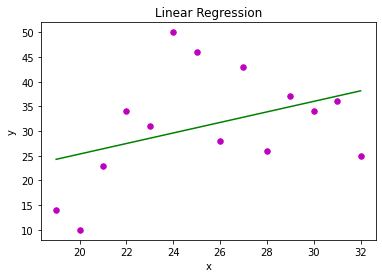

In [ ]:
#Linear Regression

import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.title("Linear Regression")
  
    # function to show plot 
    plt.show() 

b = estimate_coef(x, y) 
print(b[0])
print(b[1])
  # plotting regression line 
plot_regression_line(x, y, b) 


In [ ]:
print(b[0]+33*b[1])

39.20879120879121


7.009517806126976
0.5886842943926629


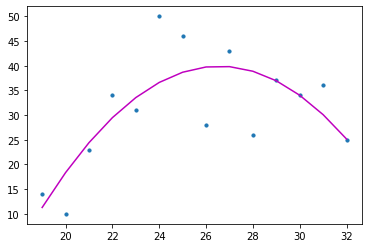

In [ ]:
#Polynomial Regression
import operator
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x1)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


In [ ]:
array = np.array([33])
array = array.reshape(-1,1)
model.predict(polynomial_features.fit_transform(array))

array([19.23626374])

In [58]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x1, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [60]:
regressor.predict(np.array([33]).reshape(-1, 1))

array([28.16])

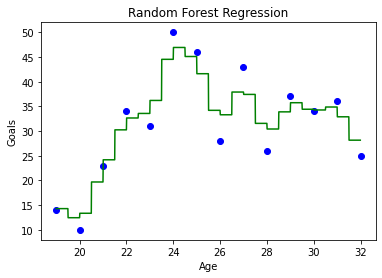

In [62]:
X_grid = np.arange(min(x1), max(x1), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(x, y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Age') 
plt.ylabel('Goals') 
plt.show()